In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from Biot_model import wavenumber

In [3]:
path=r'/Users/zachkeskinen/Documents/infrasound/figures/literature/'  # change me
# sys.path.append(path+r'\scripts')

In [4]:
##### FREQUENCY #####
# frequency 40 Hz
f = 40
# angular frequency
omega = 2*np.pi*f

##### AIR PARAMETERS
# Density
p_air = 1.1
# Compressibility
C_air = 1.3e-5
# Viscosity
nu_air = 8.5e-6

##### ICE PARAMETERS #####
# Density
p_ice = 917
# Bulk modulus
K_ice = 1.19e9
# Compressibility
C_ice = 1/K_ice

##### SNOW PARAMETERS #####
# Density (kg/m3)  - from field average
p_snow = 294
# Youngs Modulus of snow
youngs = 2.5e7      # There was a typo in the paper during publications. E=0.2-10**4 MPa. Sorry for that.
# Poissons of snow
poissons = 0.25
# Shear modulus of snow
shear = youngs/(2*(1+poissons))
# radius (assumes sphere)
r = 0.5
# Porosity (0.45- 0.95)
phi = 1 - (p_snow/p_ice)
# Tortuosity with r = 1/2 for sphere
t = 1 - (r*(1- (1/phi)))

# free parameters to vary:
# Permeability
k_snow = 30e-4               # Value form table 1 in Capelli et al. 2016. There are different definitions of permeability. 
# k_snow = 2.7e-8/nu_air
                            # I mixed them in the paper. Sorry for that 
                            # See function header: permeability (definition of Johnson), per=per'(m^2)/dinamic viscosity(mu)
                                                                                 
# Pore characteristic size
d = 0.00032

# Stucture Factor
d_bar = 1

##### CREATING MATERIALS #####
# air = [density, kinetic velocity, compressibility]
air = [p_air, C_air,nu_air]
# ice = [density, compressibility]
ice = [p_ice, C_ice]
# snow = [density, youngs modulus, shear modulus, permeability, pore characteristic size, structure factor, tortuosity factor]
snow = [p_snow, youngs, shear, k_snow, d, d_bar, t]

# running model
[delta1, delta2, delta3] = wavenumber(omega = omega, air = air, ice = ice, snow = snow)

# youngs

In [ ]:
fs=np.linspace(1,100,10000)
omegas=2*np.pi*fs

varying=np.linspace(2e7,3e11, 100)

fig, (ax) = plt.subplots(1, figsize = (12, 8))
for x in varying:
        if x == varying[0]:
                color = 'red'
                lw = 3
        elif x == varying[-1]:
                color = 'black'
                lw = 3
        else:
                color = 'blue'
                lw = 1
        air = [p_air, C_air,nu_air]
        ice = [p_ice, C_ice]
        shear = x/(2*(1+poissons))
        snow = [p_snow, x, shear, k_snow, d, d_bar, t]

        ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
        alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

        ax.plot(fs,alphas, color = color, linewidth = lw)

plt.xlabel('frequency Hz')
plt.ylabel('attenuation coefficient (db/cm)')

## Shear Modulus / Poissons

In [ ]:
fs=np.linspace(1,100,10000)
omegas=2*np.pi*fs

varying=np.linspace(0.1, 0.4, 100)

fig, (ax) = plt.subplots(1, figsize = (12, 8))
for x in varying:
        if x == varying[0]:
                color = 'red'
                lw = 3
        elif x == varying[-1]:
                color = 'black'
                lw = 3
        else:
                color = 'blue'
                lw = 1
        air = [p_air, C_air,nu_air]
        ice = [p_ice, C_ice]
        shear = youngs/(2*(1+x))
        snow = [p_snow, youngs, shear, k_snow, d, d_bar, t]

        ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
        alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

        ax.plot(fs,alphas, color = color, linewidth = lw)
plt.xlabel('frequency Hz')
plt.ylabel('attenuation coefficient (db/cm)')

# R/ Tortorosity

In [ ]:
fs=np.linspace(1,100,10000)
omegas=2*np.pi*fs

varying=np.linspace(0.01, 0.5, 100)

fig, (ax) = plt.subplots(1, figsize = (12, 8))
for x in varying:
        if x == varying[0]:
                color = 'red'
                lw = 3
        elif x == varying[-1]:
                color = 'black'
                lw = 3
        else:
                color = 'blue'
                lw = 1
        t = 1 - (x*(1- (1/phi)))

        air = [p_air, C_air,nu_air]
        ice = [p_ice, C_ice]
        snow = [p_snow, youngs, shear, k_snow, d, d_bar, t]

        ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
        alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

        ax.plot(fs,alphas, color = color, linewidth = lw)
plt.xlabel('frequency Hz')
plt.ylabel('attenuation coefficient (db/cm)')

# K snow

permeabaility of snow

In [ ]:
fs=np.linspace(1,1000,10000)
omegas=2*np.pi*fs

varying=np.linspace(0.2e-4, 3.6e-4, 100) # range using denities and Johnson 1982
varying = np.linspace(31e-10, 375e-10, 100)/nu_air # ranges using Domine et al 2013 with density > 200 kg/m3
varying = np.linspace(3e-10, 3e-9, 100)/nu_air #ranges using all from Sommerfeld and Rocchio (1993)
varying = np.linspace(0.2e-8, 1e-8, 100)/nu_air # ranges using zermatten et al (2017) 

fig, (ax) = plt.subplots(1, figsize = (12, 8))
for x in varying:
        if x == varying[0]:
                color = 'red'
                lw = 3
        elif x == varying[-1]:
                color = 'black'
                lw = 3
        else:
                color = 'blue'
                lw = 1
        air = [p_air, C_air,nu_air]
        ice = [p_ice, C_ice]
        snow = [p_snow, youngs, shear, x, d, d_bar, t]

        ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
        alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

        ax.plot(fs,alphas, color = color, linewidth = lw)

x = 2.7e-10/nu_air # every calculated value in Johnson et al.
air = [p_air, C_air,nu_air]
ice = [p_ice, C_ice]
snow = [p_snow, youngs, shear, x, d, d_bar, t]

ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

ax.plot(fs,alphas, color = 'green', linewidth = 5)

plt.xlabel('frequency Hz')
plt.ylabel('attenuation coefficient (db/cm)')

# d

In [ ]:
fs=np.linspace(1,50,10000)
omegas=2*np.pi*fs

varying=np.linspace(0.0001, 0.005, 100)
varying=np.linspace(0.00024, 0.00075, 100) # 0.1 mm to 1 mm pore size

fig, (ax) = plt.subplots(1, figsize = (12, 8))
for x in varying:
        if x == varying[0]:
                color = 'red'
                lw = 3
        elif x == varying[-1]:
                color = 'black'
                lw = 3
        else:
                color = 'blue'
                lw = 1
        air = [p_air, C_air,nu_air]
        ice = [p_ice, C_ice]
        snow = [p_snow, youngs, shear, k_snow, x, d_bar, t]

        ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
        alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

        ax.plot(fs,alphas, color = color, linewidth = lw)
x = 0.00032 # pore size for rounded grains of 190 kg/m3
air = [p_air, C_air,nu_air]
ice = [p_ice, C_ice]
snow = [p_snow, youngs, shear, k_snow, x, d_bar, t]

ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

ax.plot(fs,alphas, color = 'green', linewidth = 5)

plt.xlabel('frequency Hz')
plt.ylabel('attenuation coefficient (db/cm)')

# dbar

In [ ]:
fs=np.linspace(1,100,10000)
omegas=2*np.pi*fs

varying=np.linspace(0.5, 1, 100)

fig, (ax) = plt.subplots(1, figsize = (12, 8))
for x in varying:
        if x == varying[0]:
                color = 'red'
                lw = 3
        elif x == varying[-1]:
                color = 'black'
                lw = 3
        else:
                color = 'blue'
                lw = 1
        air = [p_air, C_air,nu_air]
        ice = [p_ice, C_ice]
        snow = [p_snow, youngs, shear, k_snow, d, x, t]

        ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
        alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

        ax.plot(fs,alphas, color = color, linewidth = lw)

x = 0.837 # every calculated value in Johnson et al.
air = [p_air, C_air,nu_air]
ice = [p_ice, C_ice]
snow = [p_snow, youngs, shear, k_snow, d, x, t]

ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

ax.plot(fs,alphas, color = 'green', linewidth = 5)

plt.xlabel('frequency Hz')
plt.ylabel('attenuation coefficient (db/cm)')


## all together now

In [6]:
import pickle
with open('/Users/zachkeskinen/Documents/infrasound/data/literature/ourmeanattenuation.pkl', 'rb') as f:
    ourmean = pickle.load(f)
ourmean = ourmean[ourmean.index < 50]

In [7]:
import seaborn as sns
sns.set(rc={
 'axes.axisbelow': True,
 'axes.edgecolor': 'grey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.grid.axis':'y',
 'axes.labelcolor': 'black',
 'axes.linewidth': 1,
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'lightgrey',
 'figure.figsize': (18, 12),
 'grid.color': 'grey',
 'grid.alpha':1,
 'grid.linewidth':0.5,
 'image.aspect':'auto',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'savefig.dpi':300,
 'text.color': 'black',
 'xtick.bottom': False,
 'xtick.color': 'grey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'grey',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.color':'grey',
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":26,
                                "axes.labelsize":16})

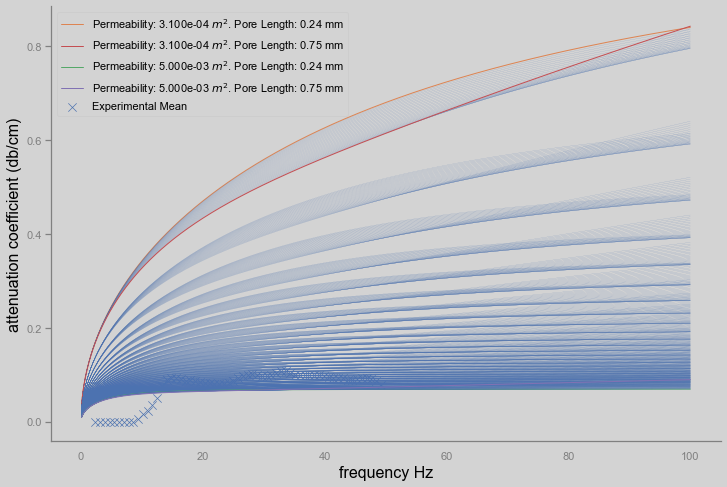

In [8]:
fs=np.linspace(0.1,100,10000)
omegas=2*np.pi*fs

n = 30
pores=np.linspace(0.00024, 0.00075, n) # 0.1 mm to 1 mm pore size
perms = np.linspace(3.1e-4, 5e-3, n) # ranges using zermatten et al (2017) 
fig, (ax) = plt.subplots(1, figsize = (12, 8))

for perm in perms:
        for pore in pores:

                snow = [p_snow, youngs, shear, perm, pore, d_bar, t]

                ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
                alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

                # Label a few values
                label = f'Permeability: {perm:.3e} $m^{2}$. Pore Length: {pore*1000:.2} mm'
                if pore == pores[0] and perm == perms[0]:
                        ax.plot(fs,alphas, color = 'C1', linewidth = 1, label = label)
                elif pore == pores[0] and perm == perms[-1]:
                        ax.plot(fs,alphas, color = 'C2', linewidth = 1, label = label)
                elif pore == pores[-1] and perm == perms[0]:
                        ax.plot(fs,alphas, color = 'C3', linewidth = 1, label = label)
                elif pore == pores[-1] and perm == perms[-1]:
                        ax.plot(fs,alphas, color = 'C4', linewidth = 1, label = label)
                else:
                        ax.plot(fs,alphas, color = 'C0', linewidth = 0.1)

sns.scatterplot(data = ourmean, label = 'Experimental Mean', color = 'C0', marker = 'x', s = 70, ax = ax)
plt.legend()
plt.xlabel('frequency Hz')
plt.ylabel('attenuation coefficient (db/cm)')
plt.show()

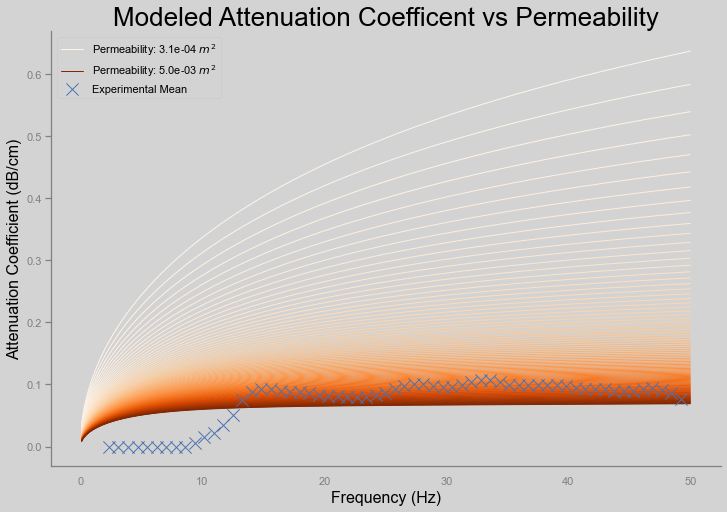

In [9]:
import matplotlib as mpl
from os.path import join
fs=np.linspace(0.1,50,1000)
omegas=2*np.pi*fs

n = 100
pores=np.linspace(0.00024, 0.00075, n) # 0.1 mm to 1 mm pore size
perms = np.linspace(3.1e-4, 5e-3, n) # ranges using zermatten et al (2017) 
fig, (ax) = plt.subplots(1, figsize = (12, 8))

for i, perm in enumerate(perms):
        pore = 0.0005
        # for pore in pores:

        snow = [p_snow, youngs, shear, perm, pore, d_bar, t]

        ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
        alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

        # Label a few values
        # label = f'Permeability: {perm:.3e} $m^{2}$. Pore Length: {pore*1000:.2} mm'
        # if pore == pores[0] and perm == perms[0]:
        #         ax.plot(fs,alphas, color = 'C1', linewidth = 3, label = label)
        # elif pore == pores[0] and perm == perms[-1]:
        #         ax.plot(fs,alphas, color = 'C2', linewidth = 3, label = label)
        # elif pore == pores[-1] and perm == perms[0]:
        #         ax.plot(fs,alphas, color = 'C3', linewidth = 3, label = label)
        # elif pore == pores[-1] and perm == perms[-1]:
        #         ax.plot(fs,alphas, color = 'C4', linewidth = 3, label = label)
        # else:
        c = mpl.cm.get_cmap('Oranges')(i/len(perms))
        label = f'Permeability: {perm:.1e} $m^{2}$'
        if perm == perms[0]:
                ax.plot(fs,alphas, color = c, linewidth = 1, label = label)
        elif perm == perms[-1]:
                ax.plot(fs,alphas, color = c, linewidth = 1, label = label)
        else:
                ax.plot(fs,alphas, color = c, linewidth = 1)
        

sns.scatterplot(data = ourmean, label = 'Experimental Mean', color = 'C0', marker = 'x', s = 150, ax = ax, zorder = 3)
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation Coefficient (dB/cm)')
plt.title('Modeled Attenuation Coefficent vs Permeability')
plt.savefig(join('/Users/zachkeskinen/Documents/infrasound/figures/biots', 'perm_1-50.png'))

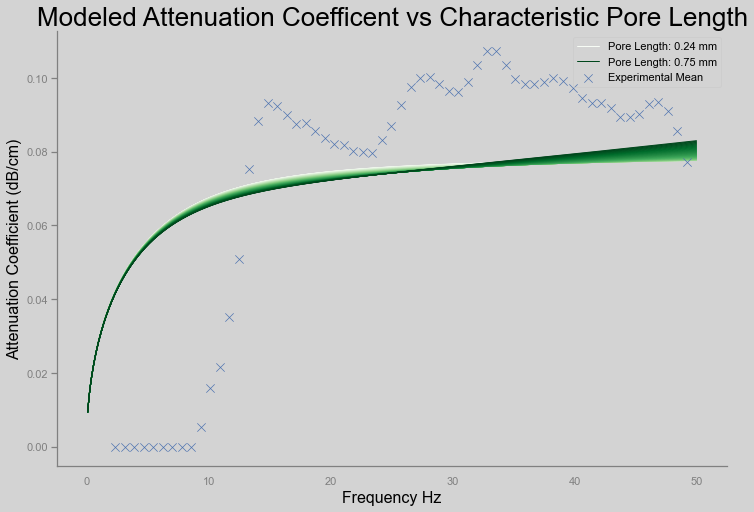

In [10]:
fs=np.linspace(0.1,50,1000)
omegas=2*np.pi*fs

n = 100
pores=np.linspace(0.00024, 0.00075, n) # 0.1 mm to 1 mm pore size
perms = np.linspace(3.1e-4, 5e-3, n) # ranges using zermatten et al (2017) 
fig, (ax) = plt.subplots(1, figsize = (12, 8))

for i, pore in enumerate(pores):
        perm = 0.00438414
        # for pore in pores:

        snow = [p_snow, youngs, shear, perm, pore, d_bar, t]

        ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
        alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

        c = mpl.cm.get_cmap('Greens')(i/len(perms))
        label = f'Pore Length: {pore*1000:.2} mm'
        if pore == pores[0]:
                ax.plot(fs,alphas, color = c, linewidth = 1, label = label)
        elif pore == pores[-1]:
                ax.plot(fs,alphas, color = c, linewidth = 1, label = label)
        else:
                ax.plot(fs,alphas, color = c, linewidth = 1)
        

sns.scatterplot(data = ourmean, label = 'Experimental Mean', color = 'C0', marker = 'x', s = 70, ax = ax, zorder = 3)
plt.legend()
plt.xlabel('Frequency Hz')
plt.ylabel('Attenuation Coefficient (dB/cm)')
plt.title('Modeled Attenuation Coefficent vs Characteristic Pore Length')

plt.savefig(join('/Users/zachkeskinen/Documents/infrasound/figures/biots', 'pore_1-50.png'))

In [11]:
fs=np.linspace(0.1,50,1000)
omegas=2*np.pi*fs

n = 100
pores=np.linspace(0.00024, 0.00075, n) # 0.1 mm to 1 mm pore size
perms = np.linspace(3.1e-4, 5e-3, n) # ranges using zermatten et al (2017) 
d_bars = np.linspace(0.5, 1, n)

fig, (ax) = plt.subplots(1, figsize = (12, 8))

for d_bar in d_bars:
        for i, pore in enumerate(pores):
                perm = 0.0019
                d_bar= 1
                # for pore in pores:

                snow = [p_snow, youngs, shear, perm, pore, d_bar, t]

                ks=wavenumber(omega = omegas, air = air, ice = ice, snow = snow)
                alphas=-20*np.imag(ks[1])/np.log10(np.e)/100

                c = mpl.cm.get_cmap('Greens')(i/len(perms))
                label = f'Pore Length: {pore*1000:.2} mm'
                if pore == pores[0]:
                        ax.plot(fs,alphas, color = c, linewidth = 1, label = label)
                elif pore == pores[-1]:
                        ax.plot(fs,alphas, color = c, linewidth = 1, label = label)
                else:
                        ax.plot(fs,alphas, color = c, linewidth = 1)
        

sns.scatterplot(data = ourmean, label = 'Experimental Mean', color = 'C0', marker = 'x', s = 70, ax = ax, zorder = 3)
plt.legend()
plt.xlabel('frequency Hz')
plt.ylabel('attenuation coefficient (db/cm)')
plt.show()